# Unsupervised Learning: Customer Segmentation

data source: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering

In [199]:
# load data
path = os.getcwd()
file = os.sep.join([path] + ['Mall_Customers.csv'])
data = pd.read_csv(file)

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [201]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [203]:
# drop customer ID
data.drop(columns = ['CustomerID'], inplace = True)

In [205]:
round(data.describe(), 2)

,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00
mean,38.85,60.56,50.20
std,13.97,26.26,25.82
min,18.00,15.00,1.00
25%,28.75,41.50,34.75
50%,36.00,61.50,50.00
75%,49.00,78.00,73.00
max,70.00,137.00,99.00


## EDA and Feature Engineering

### Gender

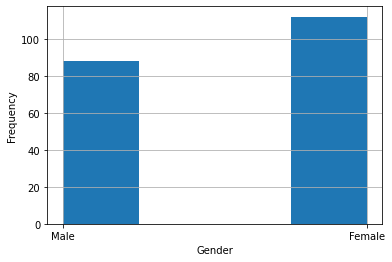

In [18]:
data.Gender.hist(bins = 4);
plt.xlabel('Gender');
plt.ylabel('Frequency');
plt.savefig('gender.png')

In [28]:
data['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [29]:
g = data.groupby('Gender').mean()
g

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


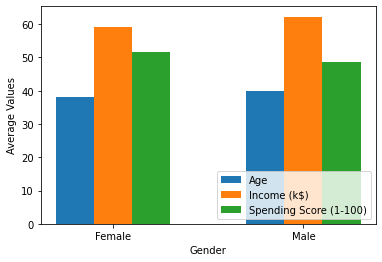

In [57]:
# plot
r = np.arange(2)
width = 0.2
plt.figure(figsize = (6, 4))
bar1 = plt.bar(r, g['Age'], width)
bar2 = plt.bar(r + width, g['Annual Income (k$)'], width)
bar3 = plt.bar(r + width * 2, g['Spending Score (1-100)'], width)
plt.xticks(r + width,['Female', 'Male']);
plt.xlabel('Gender');
plt.ylabel('Average Values');
plt.legend( (bar1, bar2, bar3), ('Age', 'Income (k$)', 'Spending Score (1-100)'), loc = 'lower right');
plt.savefig('avg1.png')

### Age

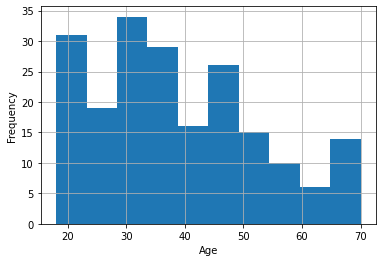

In [22]:
data.Age.hist(bins = 10);
plt.xlabel('Age');
plt.ylabel('Frequency');
plt.savefig('age.png')

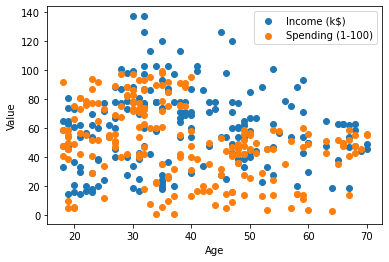

In [64]:
plt.scatter(data.Age, data['Annual Income (k$)'], label = 'Income (k$)');
plt.scatter(data.Age, data['Spending Score (1-100)'], label = 'Spending (1-100)');
plt.legend(loc = 'upper right');
plt.xlabel('Age');
plt.ylabel('Value');
plt.savefig('age_ip.png')

### Income and Spending

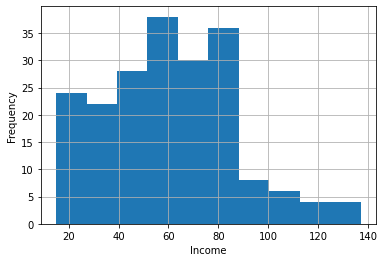

In [21]:
data['Annual Income (k$)'].hist();
plt.xlabel('Income');
plt.ylabel('Frequency');
plt.savefig('inc.png')

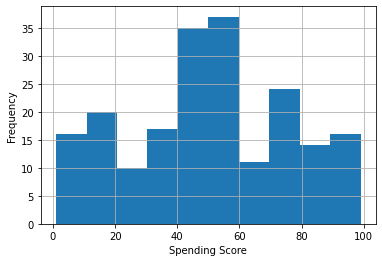

In [23]:
data['Spending Score (1-100)'].hist();
plt.xlabel('Spending Score');
plt.ylabel('Frequency');
plt.savefig('spend.png')

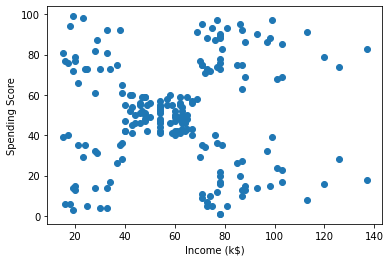

In [66]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)']);
plt.xlabel('Income (k$)');
plt.ylabel('Spending Score');
plt.savefig('inc_sp.png')

In [207]:
# binarize gender
data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})

In [208]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


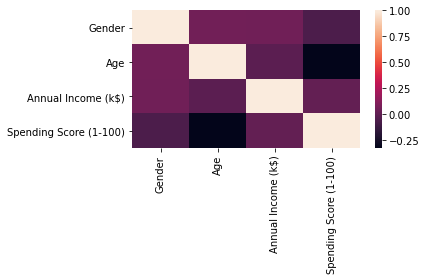

In [212]:
cor = data.corr(method='pearson')
sns.heatmap(cor)
plt.tight_layout()
plt.savefig('cor.png')

In [209]:
# scale features
s = StandardScaler()
X = s.fit_transform(data)

## K Means

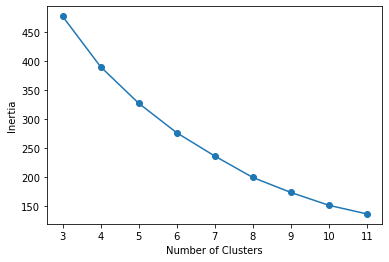

In [213]:
inertia = []
ks = [3, 4, 5, 6, 7, 8, 9, 10, 11]

for k in ks:
    km = KMeans(n_clusters = k)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(ks,inertia)
plt.scatter(ks,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');
plt.savefig('km.png')

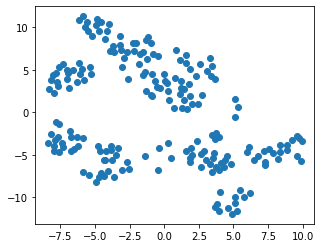

In [141]:
tsne = TSNE(n_components = 2, perplexity=50, n_iter=300, random_state = 870);
tsne_res = tsne.fit_transform(X)

plt.figure(figsize = (5, 4))
plt.scatter(tsne_res[:, 0], tsne_res[:, 1]);


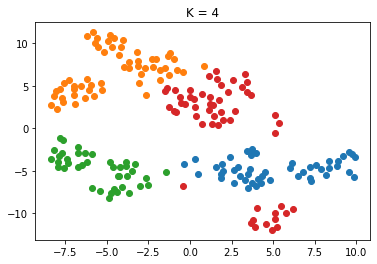

In [156]:
km4 = KMeans(n_clusters = 4)
km_res1 = km4.fit_predict(X)


for k in range(4):
    res = tsne_res[km_res1 == k]
    plt.scatter(res[:, 0], res[:, 1])
plt.title('K = 4')
plt.savefig('k4.png')

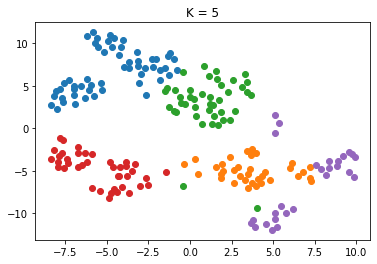

In [154]:
km5 = KMeans(n_clusters = 5)
km_res1 = km5.fit_predict(X)


for k in range(5):
    res = tsne_res[km_res1 == k]
    plt.scatter(res[:, 0], res[:, 1])
plt.title('K = 5')
plt.savefig('k5.png')

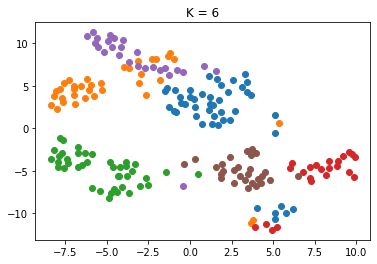

In [177]:
km6 = KMeans(n_clusters = 6)
km_res1 = km6.fit_predict(X)


for k in range(6):
    res = tsne_res[km_res1 == k]
    plt.scatter(res[:, 0], res[:, 1])
plt.title('K = 6')
plt.savefig('k6.png')

In [184]:
# see average properties of each group
kmdata = data.copy()
kmdata['group'] = km_res1
kmdata.groupby('group').mean().sort_values(by = ['Gender', 'Age', 'Annual Income (k$)'])

,Gender,Age,Annual Income (k$),Spending Score (1-100)
group,,,,
4,0.000000,26.576923,32.653846,62.923077
1,0.000000,30.527778,79.777778,65.583333
0,0.000000,50.217391,53.543478,36.739130
3,0.826087,39.043478,90.608696,15.391304
2,1.000000,28.536585,61.804878,71.097561
5,1.000000,57.214286,46.785714,38.714286


## DBSCAN (OPTICS)
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html

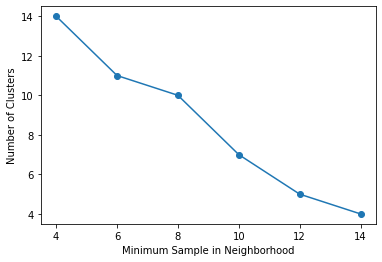

In [214]:
ns = [4, 6, 8, 10, 12, 14]
clus = []

for n in ns:
    optics = OPTICS(min_samples = n)
    res = optics.fit_predict(X)
    clus.append(len(np.unique(res)))
    
plt.plot(ns,clus)
plt.scatter(ns,clus)
plt.xlabel('Minimum Sample in Neighborhood')
plt.ylabel('Number of Clusters');
plt.savefig('optics.png')

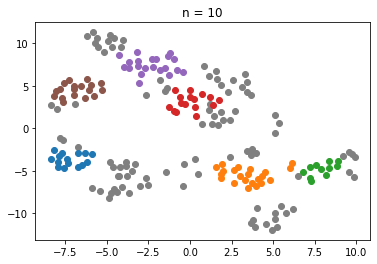

In [185]:
op10 = OPTICS(min_samples = 10)
res = op10.fit_predict(X)

out = tsne_res[res == -1]
plt.scatter(out[:, 0], out[:, 1], color = 'grey')

for g in range(len(np.unique(res))):
    sub = tsne_res[res == g]
    plt.scatter(sub[:, 0], sub[:, 1])
plt.title('n = 10')
plt.savefig('op10.png')

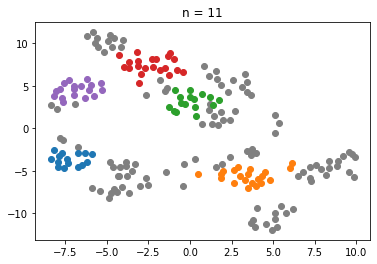

In [180]:
op11 = OPTICS(min_samples = 11)
res = op11.fit_predict(X)

out = tsne_res[res == -1]
plt.scatter(out[:, 0], out[:, 1], color = 'grey')

for g in range(len(np.unique(res))):
    sub = tsne_res[res == g]
    plt.scatter(sub[:, 0], sub[:, 1])
plt.title('n = 11')
plt.savefig('op11.png')

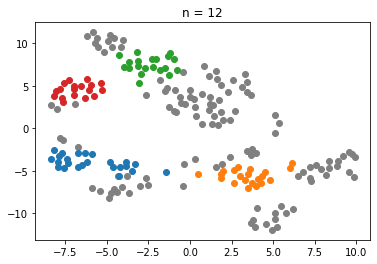

In [181]:
op12 = OPTICS(min_samples = 12)
res = op12.fit_predict(X)

out = tsne_res[res == -1]
plt.scatter(out[:, 0], out[:, 1], color = 'grey')

for g in range(len(np.unique(res))):
    sub = tsne_res[res == g]
    plt.scatter(sub[:, 0], sub[:, 1])
plt.title('n = 12')
plt.savefig('op12.png')

In [188]:
# use n = 10
opdata = data.copy()
opdata['group'] = res
opdata = opdata[opdata.group != -1] # exclude outliers
opdata.groupby('group').mean().sort_values(by = ['Gender', 'Age'])

,Gender,Age,Annual Income (k$),Spending Score (1-100)
group,,,,
4,0.0,25.476190,54.904762,48.619048
5,0.0,31.722222,81.722222,82.000000
3,0.0,48.187500,55.250000,48.500000
0,1.0,33.933333,80.266667,84.200000
2,1.0,44.727273,84.454545,12.818182
1,1.0,57.545455,55.409091,47.363636


## Agglomerative Clustering

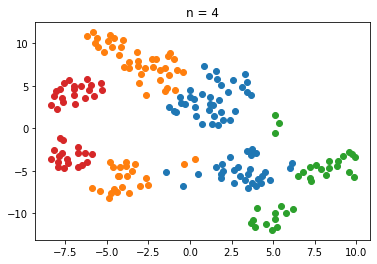

In [194]:
ag4 = AgglomerativeClustering(n_clusters=4, linkage='ward', compute_full_tree=True)
res = ag4.fit_predict(X)

for g in range(len(np.unique(res))):
    sub = tsne_res[res == g]
    plt.scatter(sub[:, 0], sub[:, 1])
plt.title('n = 4')
plt.savefig('ag4.png')

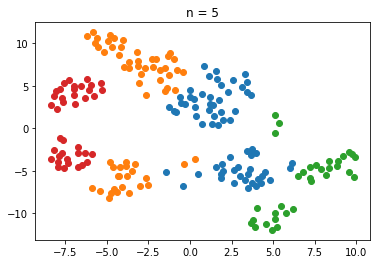

In [195]:
ag5 = AgglomerativeClustering(n_clusters=5, linkage='ward', compute_full_tree=True)
res = ag4.fit_predict(X)

for g in range(len(np.unique(res))):
    sub = tsne_res[res == g]
    plt.scatter(sub[:, 0], sub[:, 1])
plt.title('n = 5')
plt.savefig('ag5.png')

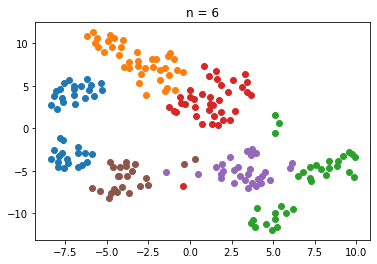

In [196]:
ag6 = AgglomerativeClustering(n_clusters=6, linkage='ward', compute_full_tree=True)
res = ag6.fit_predict(X)

for g in range(len(np.unique(res))):
    sub = tsne_res[res == g]
    plt.scatter(sub[:, 0], sub[:, 1])
plt.title('n = 6')
plt.savefig('ag6.png')

In [197]:
# n = 6
agdata = data.copy()
agdata['group'] = res
agdata.groupby('group').mean().sort_values(by = ['Gender', 'Age'])

,Gender,Age,Annual Income (k$),Spending Score (1-100)
group,,,,
1,0.000000,27.105263,46.526316,58.552632
3,0.000000,49.789474,44.105263,39.657895
0,0.461538,32.692308,86.538462,82.128205
2,0.545455,41.454545,89.090909,16.181818
5,1.000000,24.565217,39.217391,59.652174
4,1.000000,56.551724,50.034483,41.344828
